In [1]:
import TempCompleteFunctions as tpc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## To Do:
- Add angle modification functionality to spectrogram method
    - cos,sin
- Find different trig function that avoids nans for phi

In [17]:
class GWAnalysis:
    '''
    Tool for analizing gravitational waves
    '''
    
    def __init__(self, dataPath, dataFile, dataColumns, timeSample = 0, timeStep = 5, tBounce = 0, nVerts = 5):
        '''
        dataPath: relative path to the main repository of the data/program
        dataFile: file name
        dataColumns: list of columns numbers that reference the data in the file [t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz]
        timeSample: range of times to work through when analizing data, set as list [start time index, end time index]
        timeStep: time step to take when analizing data
        tBounce: post bounce time [s]
        nVerts: number of vertecies/points to use when interpreting angle information
        '''
        #Import neccesary packages to the correct namespace
        import numpy as np
        import TempCompleteFunctions as tpc
        import matplotlib.pyplot as plt
        import matplotlib.colors as colors
        
        if isinstance(nVerts, complex) == False:
            raise ValueError('nVerts must be entered as a complex number (ex: 10j), please enter a new value!')
        
        if nVerts.imag < 10j.imag:
            raise ValueError('nVerts can not be less than 10, please enter a new value!')
        
        #Set attributes
        self.dataPath = dataPath
        self.dataFile = dataFile
        self.dataColumns = dataColumns
        self.timeSample = timeSample
        self.timeStep = timeStep
        self.tBounce = tBounce
        self.nVerts = nVerts
        
    def update_TimeStep(self, timeStep):
        '''
        Update the value for timeStep
        
        timeStep: time step to take when analizing data
        '''
        self.timeStep = timeStep
    
    def update_nVerts(self, nVerts):
        '''
        Update the value for nVerts
        
        nVerts: number of vertecies/points to use when interpreting angle information,
                must be complex number 10 or greater
        '''
        #Check if value is complex
        if isinstance(nVerts, complex) == False:
            raise ValueError('nVerts must be entered as a complex number (ex: 10j), please enter a new value!')
        
        #Check if value is greater than or equal to 10j
        if nVerts.imag < 10j.imag:
            raise ValueError('nVerts can not be less than 10, please enter a new value!')

        self.nVerts = nVerts
        
        print('The number of verticies or points has been updated to', self.nVerts)
    
    def update_timeSample(self, timeSample):
        '''
        Update the value for timeSample
        
        timeSample: range of times to work through when analizing data, set as list [start time, end time, step through]
        '''
        self.timeSample = timeSample
        
    def load_QuadData(self, dataFolder = 0):
        '''
        Load and store data
        
        dataFolder: name of folder where data is stored
        '''
        #Check if the data file is stored in a folder or not, create the correct filePath
        if dataFolder != 0:
            filePath = self.dataPath + '\\' + dataFolder + '\\' + self.dataFile
        
        else:
            filePath = self.dataPath + '\\' + self.dataFile
        
        #Load in the data associated with the file and the specified columns
        t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = np.loadtxt(filePath, usecols = (self.dataColumns), unpack=True)
    
        self.rawTime = t
        self.rawData = np.array([Qxx,Qyy,Qxy,Qxz,Qyz,Qzz])
        
        #Update timeSample
        self.update_timeSample(np.arange(0,len(self.rawTime),self.timeStep))
        
    def set_rawDataHeaders(self, dataHeaders):
        '''
        Save headers for the raw data
        
        dataHeaders: list of headers equal in length to rawData
        '''
        self.dataHeaders = dataHeaders
        
#     def strain3dSurfMaxValue(self, polarization, angles = [0,np.pi,0,2*np.pi]):
#         '''
#         Get the x,y,z values of strain ploted onto a 3d sphere ??
        
#         polarization: setting for which polarization to use, (0 = cross, 1 = plus, 2 = norm diff)
#         angles: angles to use in h calculations ([theta_0,theta,phi_0,phi] Domain: Theta:[0,pi] Phi:[0,2pi])
#         '''
#         #theta - altitudinal angle [radians]
#         #phi   - azimuthal angle  [radians]
#         thetaPhi = np.mgrid[angles[0]:angles[1]:self.nVerts, angles[2]:angles[3]:self.nVerts] #Define angles to use when calculating h
        
#         analysisTime = self.rawTime[self.timeSample]
        
#         QddotXX = tpc.cenDiff(analysisTime,self.rawData[0][self.timeSample])
#         QddotYY = tpc.cenDiff(analysisTime,self.rawData[1][self.timeSample])
#         QddotXY = tpc.cenDiff(analysisTime,self.rawData[2][self.timeSample])
#         QddotXZ = tpc.cenDiff(analysisTime,self.rawData[3][self.timeSample])
#         QddotYZ = tpc.cenDiff(analysisTime,self.rawData[4][self.timeSample])
#         QddotZZ = tpc.cenDiff(analysisTime,self.rawData[5][self.timeSample])
        
#         if polarization == 0: 
#             hVals = tpc.crossGeneral(thetaPhi[0],thetaPhi[1],analysisTime,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,CenDiff=False)

#         elif polarization == 1:
#             hVals = tpc.plusGeneral(thetaPhi[0],thetaPhi[1],analysisTime,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,QddotZZ,CenDiff=False)

#         elif polarization == 2:
#             hVals = tpc.normDiffGeneral(thetaPhi[0],thetaPhi[1],analysisTime,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,QddotZZ,CenDiff=False)

#         else:
#             print('Correct the value given for polarization (0 = cross, 1 = plus, 2 = norm diff)!!')
#             return()
        
#         '''
#         Get confirmation for these conversions
#         '''
#         xSph = hVals * np.sin(thetaPhi[0]) * np.cos(thetaPhi[1])
#         ySph = hVals * np.sin(thetaPhi[0]) * np.sin(thetaPhi[1])
#         zSph = hVals * np.cos(thetaPhi[0])

#         return(xSph,ySph,zSph,hVals)
           
    def GW2dAnalysis(self, polarization, angles = [0,np.pi,0,2*np.pi], graphSize = [10,10], xlim = [0,0], ylim = [0,0]):
        '''
        
        polarization: setting for which polarization to use, (0 = cross, 1 = plus, 2 = norm diff)
        angles: angles to use in h calculations ([theta_0,theta,phi_0,phi] Domain: Theta:[0,pi] Phi:[0,2pi])
        graphSize: size of the image produced, list [width, height]
        xlim: x-axis limits for the graph, list [left bound, right bound]
        ylim: y-axis limits for the graph, list [lower bound, upper bound]
        '''
        #Data acquisition
        tempH = tpc.strain3dSurfMaxValue(self, polarization, angles)[3] #Only grab hVals

        tempH = tempH[:,4,0]# simplification/generalization of tempH = tempH.reshape(len(self.timeSample))
        
        #Plotting
        fig, ax = plt.subplots(1)
        fig.set_size_inches(graphSize[0],graphSize[1])

        ax.plot(self.rawTime[self.timeSample]-self.tBounce, tempH) 
        ax.axvline(0, c='black', label = 'Post Bounce Time: ' + str(self.tBounce), alpha = 0.5)

        #Check if the limits are set by the user or not
        if xlim != [0,0]:
            ax.set_xlim(xlim)
        else:
            ax.set_xlim([-0.05,self.rawTime[-1]-self.tBounce+0.05])

        if ylim != [0,0]:
            ax.set_ylim(ylim)
            
        ax.set_title('GW Strain Vs Post Bounce Time ('+  self.dataFile +')')
        ax.set_xlabel('Time (s)')
        ax.legend()
        
#         attachedDataFR = np.loadtxt('RawDataFiles/s40_fr_GW_short.txt')

#         ax.plot(attachedDataFR[:,0], attachedDataFR[:,1], color = 'red')

#         ax.set_xlabel('Time (s)')
        
        
    def genScatterPlot(self, cord_XYZ_Set, prefix, path, title, analysisTime, rotationArray = [0], norm = False, dataSlice = (0,2), alpha = 0.8): 
        '''
        Check if timeIt is needed here
            Check to see if its the same length as xSet
            
        cord_XYZ_Set: array of cordinates x,y,z with shape [3,n] where n is the number of samples
        prefix: generated image filename prefix
        path: path from working directory to where generated image files should be stored (end with /)
        title: title of the generated plot
        rotationArray: array of degrees to rotate through when generating the images for the animation
        analysisTime: 
        norm: conditional, whether to normalize the plotted data or not
        dataSlice: tuple indicating what times (between the values) from the data will be plotted
        alpha: alpha level to plot data points at
        '''

        #Unpack cord values (using .flatten on sliced object)
        xSet, ySet, zSet = cord_XYZ_Set[:,0], cord_XYZ_Set[:,1], cord_XYZ_Set[:,2]

        if norm == True: 
            rPos = (xSet**2 + ySet**2 + zSet**2)**(1/2) #Get length of r

            xSet = xSet/rPos #Normalize x data
            ySet = ySet/rPos #Normalize y data
            zSet = zSet/rPos #Normalize z data

        count = 0
        newLen = len(xSet[dataSlice[0]:dataSlice[1]]) #Length of the data after slicing with dataSliceVals

        colorMapName = 'viridis'
        colorMap = plt.get_cmap(colorMapName) #cmap to use
        new_cmap = tpc.truncate_colormap(colorMap, dataSlice[0]/(len(xSet)),
                                    dataSlice[1]/(len(xSet)), newLen) #New cmap generated from dataSliceVals and colorMap
        
        for i in rotationArray: #Redraw plot and savefig
            fig = plt.figure(figsize = (15,15))
            axSV_MV = fig.add_subplot(111, projection='3d')

            xPlot = xSet[dataSlice[0]:dataSlice[1]]
            yPlot = ySet[dataSlice[0]:dataSlice[1]]
            zPlot = zSet[dataSlice[0]:dataSlice[1]]

            '''
            The following code snippet is used to mask parts of the data
            In this case only the positive elements along the x-axis
            '''
    #         maskXPositive = xPlot > 0

    #         xPlot = xPlot[maskXPositive]
    #         yPlot = yPlot[maskXPositive]
    #         zPlot = zPlot[maskXPositive]

    #         newLen = len(xPlot)

            sc = axSV_MV.scatter(xPlot, yPlot, zPlot, 
                                 c = np.linspace(dataSlice[0], dataSlice[1], newLen), 
                                 cmap = new_cmap, s = 60, edgecolors = 'black', alpha = alpha)

            axSV_MV.view_init(elev=0, azim=i) #Change view parameters (spin along the azimuth)

            axSV_MV.set_xlabel('x', fontsize = 15) #Assign label
            axSV_MV.set_ylabel('y', fontsize = 15) #Assign label
            axSV_MV.set_zlabel('z', fontsize = 15) #Assign label

            axSV_MV.set_title(title, y=0.95, fontsize=15)

#             axSV_MV.set_box_aspect((1,1,1))
            xLim = axSV_MV.get_xlim()

            axSV_MV.set_ylim(xLim)
#             axSV_MV.set_zlim(xLim)

            figNorm = colors.Normalize(self.rawTime[0],self.rawTime[-1]) # map time data to colorbar (https://bit.ly/3lnV0VR)
            cBar = fig.colorbar(plt.cm.ScalarMappable(norm = figNorm, cmap = colorMapName), ax = axSV_MV, shrink=0.5) #Add color bar to axes = axSV_MV
            cBar.set_label('Time(s)', fontsize = 15)

            i_str = str(count)
            suffix = i_str.rjust(4,'0')
            fig.savefig(path + prefix + suffix + '.jpeg')
            fig.clear()
            plt.close(fig)
            count += 1
        
    def maxStrainScatterPlot(self, prefix, path, outputFileName, title, polarization = 0, angles = [0,np.pi,0,2*np.pi], norm = False, rotationArray = np.arange(0,90,1), dataSlice = (0,0)):
        '''
        
        prefix: generated image filename prefix
        path: path from working directory to where generated image files should be stored (end with /)
        title: title of the generated plot
        polarization: setting for which polarization to use, (0 = cross, 1 = plus, 2 = norm diff)
        angles: angles to use in h calculations ([theta_0,theta,phi_0,phi] Domain: Theta:[0,pi] Phi:[0,2pi])
        norm: conditional, whether to normalize the plotted data or not
        rotationArray: array of degrees to rotate through when generating the images for the animation
        dataSlice: tuple indicating what times (between the values) from the data will be plotted
        '''
        if dataSlice == (0,0):
            dataSlice = (self.rawTime[0],self.rawTime[-1])
        
        title += ' (Data: '+ self.dataFile +')'
        
        if polarization == 0:
            title += ' (cross-polarized)'
        elif polarization == 1:
            title += ' (plus-polarized)'
        elif polarization == 2:
            title += ' (normalized difference)'
        else:
            title += ' (ERROR-polarization)'
            
        if norm == True:
            title += ' (normalized)'
        else:
            title += ' (un-normalized)'
            
        analysisTime = self.rawTime[self.timeSample] #Sampled time
        
        sV_X, sV_Y, sV_Z, sV_HR = tpc.strain3dSurfMaxValue(self, polarization, angles = [0,np.pi,0,2*np.pi]) #sV_# -> strain value array (X,Y,Z,R)

        #sV_HR_Pos = np.array([]) #Initialize empty array
        
        sV_X_Flat = sV_X.reshape((len(sV_X),len(sV_X[0])**2)) #Flatten cord array to 2d array 
        sV_Y_Flat = sV_Y.reshape((len(sV_Y),len(sV_Y[0])**2)) #Flatten cord array to 2d array 
        sV_Z_Flat = sV_Z.reshape((len(sV_Z),len(sV_Z[0])**2)) #Flatten cord array to 2d array 
        sV_HR_Flat = sV_HR.reshape((len(sV_HR),len(sV_HR[0])**2)) #Flatten radius array to 2d array 

        sV_HR_Pos = np.argmax(sV_HR_Flat,axis=1) #Get max R value at each time

        sV_X_MV = np.take_along_axis(sV_X_Flat, np.expand_dims(sV_HR_Pos, axis=1),axis=1) #Get values associated with max R values at each time
        sV_Y_MV = np.take_along_axis(sV_Y_Flat, np.expand_dims(sV_HR_Pos, axis=1),axis=1) #Get values associated with max R values at each time
        sV_Z_MV = np.take_along_axis(sV_Z_Flat, np.expand_dims(sV_HR_Pos, axis=1),axis=1) #Get values associated with max R values at each time

        sV_XYZ_MV = np.hstack((sV_X_MV,sV_Y_MV,sV_Z_MV)) #Stack cord arrays 

        dataSliceStart = int(np.where(analysisTime == analysisTime[(analysisTime >= dataSlice[0]) & (analysisTime <= dataSlice[1])][0])[0]) #Get slice parameters from dataSlice
        dataSliceEnd = int(np.where(analysisTime == analysisTime[(analysisTime >= dataSlice[0]) & (analysisTime <= dataSlice[1])][-1])[0]) #Get slice parameters from dataSlice
        
        self.genScatterPlot(sV_XYZ_MV, prefix, path, title, rotationArray, analysisTime, norm = norm, dataSlice = (dataSliceStart, dataSliceEnd)) #Generate 3D scatter plot
        
        print('ffmpeg compilation string: ', end="")
        print('ffmpeg -framerate 10 -i ' + prefix + '%04d.jpeg ' + outputFileName + 'Movie.mp4')
        
        
    def dipoleDirecPlots(self, N = 0, polarization = 0, angles = [0,np.pi/2,0,2*np.pi], figSize = (40,20), norm = False, phiTF = False, specTF = False, saveTf = False, fileName = ''):
        '''
        Generate plots of data to analyse dipole direction of GW

        polarization: setting for which polarization to use, (0 = cross, 1 = plus, 2 = norm diff)
        angles: which angles to take the spectrogram over [theta_initial, theta_final, phi_initial, phi_final]
        figSize: size to create each image as
        norm: conditional for whether to normalize the data or not 
        N: number of sampled points
        phiTF: conditional for whether to generate plots with the relevant phi data
        specTF: conditional for whether to generate a spectrogram for the data
        saveTF: conditional for whether to save the image or not
        fileName: output file name used when saveTF = True, continues from self.path
        '''
        fntSize = 25 #Fontsize for all plots
        legendSize = 25 #Size of the legend (if I can get it working)

        theta, phi, time = tpc.maxStrainDipoleDirection(self, polarization = polarization, angles = angles, norm = norm) #Generate theta, phi, and time data to be used in the following calculations
        
        fig = plt.figure(figsize = figSize)
        axSV_MV_A1 = fig.add_subplot(411)
        
#         print('Theta angles summed', np.sum(theta))
        
        axSV_MV_A1.plot(self.rawTime[self.timeSample], theta, c = 'blue', label = r'$\theta$')
        axSV_MV_A1.tick_params(axis='both', which='major', labelsize=fntSize/2)
        axSV_MV_A1.set_title(self.dataFile + ' : theta', fontsize = fntSize)
        #axSV_MV_A1.legend(prop = {'size':legendSize})
        axSV_MV_A1.grid()

        title = 'Fourier Transform of:' + self.dataFile

        if specTF == True:
            f1, t1, Sxx1 = tpc.genSpectOutputs(N, self.rawTime[self.timeSample], angle1 = theta)[:3]

            axSV_MV_F1 = fig.add_subplot(412, sharex = axSV_MV_A1)

            title = 'Spectrogram (' + self.dataFile + ' : theta)'

            axSV_MV_F1.pcolormesh(t1, f1, Sxx1, shading='gouraud')
            axSV_MV_F1.grid()
            axSV_MV_F1.tick_params(axis='both', which='major', labelsize=fntSize/2)
            axSV_MV_F1.set_ylabel('Frequency [Hz]', fontsize = fntSize)
            axSV_MV_F1.set_xlabel('Time [sec]', fontsize = fntSize)
            axSV_MV_F1.set_title(title, fontsize = fntSize)
            axSV_MV_F1.set_ylim(0,3500)

        if phiTF == True:

            if specTF == True:
                axSV_MV_A2 = fig.add_subplot(413)

            else:
                axSV_MV_A2 = fig.add_subplot(412)

#             print('Phi angles summed', np.sum(phi))
            
            axSV_MV_A2.plot(self.rawTime[self.timeSample], phi, c = 'red', label = '$\phi$')
            axSV_MV_A2.tick_params(axis='both', which='major', labelsize=fntSize/2)
            axSV_MV_A2.set_title(self.dataFile + ' : phi', fontsize = fntSize)
            #axSV_MV_A2.legend(prop = {'size':legendSize})
            axSV_MV_A2.grid()

            if specTF == True:
                f2, t2, Sxx2 = tpc.genSpectOutputs(N, self.rawTime[self.timeSample], angle2 = phi)[3:]

                axSV_MV_F2 = fig.add_subplot(414, sharex = axSV_MV_A2)

                title = 'Spectrogram (' + self.dataFile + ' : phi)'

                axSV_MV_F2.pcolormesh(t2, f2, Sxx2, shading='gouraud')
                axSV_MV_F2.grid()
                axSV_MV_F2.tick_params(axis='both', which='major', labelsize=fntSize/2)
                axSV_MV_F2.set_ylabel('Frequency [Hz]', fontsize = fntSize)
                axSV_MV_F2.set_xlabel('Time [sec]', fontsize = fntSize)
                axSV_MV_F2.set_title(title, fontsize = fntSize)
                axSV_MV_F2.set_ylim(0,3500)
        
        fig.tight_layout()
        
        if saveTf == True:

            fig.savefig(self.path + fileName + '.jpeg')
            
    def mollweideSpec(self, polarization = 0, angles = [0,np.pi/2,0,2*np.pi], figSize = (40,20), norm = False, dataSlice = (0,0), saveTf = False, fileName = ''):
        '''
        
        polarization: setting for which polarization to use, (0 = cross, 1 = plus, 2 = norm diff)
        angles: which angles to take the spectrogram over [theta_initial, theta_final, phi_initial, phi_final]
        figSize: size to create each image as
        norm: conditional for whether to normalize the data or not
        dataSlice: tuple indicating what times (between the values) from the data will be plotted
        saveTF: conditional for whether to save the image or not
        fileName: output file name used when saveTF = True, continues from self.path
        '''
        
        if dataSlice == (0,0):
            dataSlice = (self.rawTime[0],self.rawTime[-1])
        
        fig = plt.figure(figsize = (15,15))
        axSV_MV = fig.add_subplot(111, projection='mollweide')

        theta, phi, time = tpc.maxStrainDipoleDirection(self, polarization = polarization, angles = angles, norm = norm) #Generate theta, phi, and time data to be used in the following calculations

#         tempPhi = np.remainder(phi + 2*np.pi - 0, 2*np.pi)
#         indecies = tempPhi > np.pi
#         tempPhi[indecies] -= 2*np.pi
        
        ra = -phi
        dec = theta

        analysisTime = time #Sampled time
        
        dataSliceStart = int(np.where(analysisTime == analysisTime[(analysisTime >= dataSlice[0]) & (analysisTime <= dataSlice[1])][0])[0]) #Get slice parameters from dataSlice
        dataSliceEnd = int(np.where(analysisTime == analysisTime[(analysisTime >= dataSlice[0]) & (analysisTime <= dataSlice[1])][-1])[0]) #Get slice parameters from dataSlice
        
        newLen = len(theta[dataSliceStart:dataSliceEnd]) #Length of the data after slicing with dataSliceVals
        
        colorMapName = 'viridis'
        colorMap = plt.get_cmap(colorMapName) #cmap to use
        new_cmap = tpc.truncate_colormap(colorMap, dataSliceStart/(len(theta)),
                                    dataSliceEnd/(len(theta)), newLen) #New cmap generated from dataSliceVals and colorMap
        
        axSV_MV.scatter(ra, dec, c = np.linspace(dataSliceStart, dataSliceEnd, newLen+1), 
                                 cmap = new_cmap, s = 60, edgecolors = 'black', alpha = 0.8) #generate the scatter plot over a mollweide projection
        
        axSV_MV.grid(True) #enable the plots grid
        
        figNorm = colors.Normalize(self.rawTime[0],self.rawTime[-1]) # map time data to colorbar (https://bit.ly/3lnV0VR)
        cBar = fig.colorbar(plt.cm.ScalarMappable(norm = figNorm, cmap = colorMapName), ax = axSV_MV, shrink=0.5) #Add color bar to axes = axSV_MV
        cBar.set_label('Time(s)', fontsize = 15)

## Initialize Data Objects

In [23]:
s40_fr = GWAnalysis(r'C:\Users\crazy\PajkosResearch', 's40_3d_fr.dat', [0, 49, 51, 50, 52, 53, 54], timeStep=5, nVerts=12j, tBounce=0.484945-0.001)
s40_fr.load_QuadData('RawDataFiles')
s40_fr.set_rawDataHeaders(['Qxx','Qyy','Qxy','Qxz','Qyz','Qzz'])

s40_nor = GWAnalysis( r'C:\Users\crazy\PajkosResearch', 's40_3d_nor.dat', [0, 49, 51, 50, 52, 53, 54], timeStep=5, nVerts=10j, tBounce=0.4710)
s40_nor.load_QuadData('RawDataFiles')
s40_nor.set_rawDataHeaders(['Qxx','Qyy','Qxy','Qxz','Qyz','Qzz'])

s40_sr = GWAnalysis( r'C:\Users\crazy\PajkosResearch', 's40_3d_sr.dat', [0, 49, 51, 50, 52, 53, 54], timeStep=5, nVerts=10j, tBounce=0.474475)
s40_sr.load_QuadData('RawDataFiles')
s40_sr.set_rawDataHeaders(['Qxx','Qyy','Qxy','Qxz','Qyz','Qzz'])

# mesa20_LR = GWAnalysis(r'C:/Users/crazy/PajkosResearch', 'mesa20_LR.dat', [0, 45, 47, 46, 48, 49, 50], timeStep=5, nVerts=12j, tBounce=0)
# mesa20_LR.load_QuadData('RawDataFiles')
# mesa20_LR.set_rawDataHeaders(['Qxx','Qyy','Qxy','Qxz','Qyz','Qzz'])

# mesa20_pert = GWAnalysis(r'C:/Users/crazy/PajkosResearch', 'mesa20_pert.dat', [0, 45, 47, 46, 48, 49, 50], timeStep=5, nVerts=12j, tBounce=0)
# mesa20_pert.load_QuadData('RawDataFiles')
# mesa20_pert.set_rawDataHeaders(['Qxx','Qyy','Qxy','Qxz','Qyz','Qzz'])

# mesa20_pert_LR = GWAnalysis(r'C:/Users/crazy/PajkosResearch', 'mesa20_pert_LR.dat', [0, 45, 47, 46, 48, 49, 50], timeStep=5, nVerts=12j, tBounce=0)
# mesa20_pert_LR.load_QuadData('RawDataFiles')
# mesa20_pert_LR.set_rawDataHeaders(['Qxx','Qyy','Qxy','Qxz','Qyz','Qzz'])

# mesa20_v_LR = GWAnalysis(r'C:/Users/crazy/PajkosResearch', 'mesa20_v_LR.dat', [0, 45, 47, 46, 48, 49, 50], timeStep=5, nVerts=12j, tBounce=0)
# mesa20_v_LR.load_QuadData('RawDataFiles')
# mesa20_v_LR.set_rawDataHeaders(['Qxx','Qyy','Qxy','Qxz','Qyz','Qzz'])

# mesa20b = GWAnalysis(r'C:/Users/crazy/PajkosResearch', 'mesa20b.dat', [0, 45, 47, 46, 48, 49, 50], timeStep=5, nVerts=12j, tBounce=0)
# mesa20b.load_QuadData('RawDataFiles')
# mesa20b.set_rawDataHeaders(['Qxx','Qyy','Qxy','Qxz','Qyz','Qzz'])

## 2d Strain Analysis

s40_fr.GW2dAnalysis(1,angles=[np.pi/2,np.pi/2,0,2*np.pi],graphSize=[20,10],xlim=[-0.010,0.020],ylim=[-0.5*1e-20, 0.5*1e-20])

s40_fr.GW2dAnalysis(1,angles=[np.pi/2,np.pi/2,2*np.pi,2*np.pi],graphSize=[20,10])

mesa20_LR.GW2dAnalysis(1,[np.pi/2,np.pi/2,2*np.pi,2*np.pi],[20,10])

attachedDataFR = np.loadtxt('RawDataFiles/s40_sr_GW_short.txt')

fig, ax = plt.subplots(1)
fig.set_size_inches(20,10)

ax.plot(attachedDataFR[:,0], -attachedDataFR[:,1]) 

ax.set_xlabel('Time (s)')

## Max Viewing Angle 3d Scatter Plots

In [ ]:
standardRotationArray = np.arange(0,361,2)

>### s40_fr

In [ ]:
s40_fr.update_nVerts(80j)

In [ ]:
#cross-polarized un-normalized
blockTitle = 'Maximum Gravitational Wave Strain'
s40_fr.maxStrainScatterPlot('3DScatter_s40_cross_unnorm_','AnimationRotateScatter/s40_3d_fr_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_fr_cross_UnNormalized_', blockTitle, 0, norm = False, dataSlice=(-1,4), rotationArray=standardRotationArray)

In [ ]:
#cross-polarized normalized
blockTitle = 'Maximum Gravitational Wave Strain'
s40_fr.maxStrainScatterPlot('3DScatter_s40_cross_norm_','AnimationRotateScatter/s40_3d_fr_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_fr_cross_Normalized_', blockTitle, 0, norm = True, dataSlice=(-1,4), rotationArray=standardRotationArray)


In [ ]:
#plus-polarized un-normalized
blockTitle = 'Maximum Gravitational Wave Strain'
s40_fr.maxStrainScatterPlot('3DScatter_s40_plus_unnorm_','AnimationRotateScatter/s40_3d_fr_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_fr_plus_UnNormalized_', blockTitle, 1, norm = False, dataSlice=(-1,4), rotationArray=standardRotationArray)


In [ ]:
#plus-polarized normalized
blockTitle = 'Maximum Gravitational Wave Strain'
s40_fr.maxStrainScatterPlot('3DScatter_s40_plus_norm_','AnimationRotateScatter/s40_3d_fr_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_fr_plus_Normalized_', blockTitle, 1, norm = True, dataSlice=(-1,4), rotationArray=standardRotationArray)


>### s40_nor

In [ ]:
s40_nor.update_nVerts(80j)

In [ ]:
#cross-polarized un-normalized
blockTitle = 'Maximum Gravitational Wave Strain'
s40_nor.maxStrainScatterPlot('3DScatter_s40_cross_unnorm_','AnimationRotateScatter/s40_3d_nor_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_nor_cross_UnNormalized_', blockTitle, 0, norm = False, dataSlice=(-1,4), rotationArray=standardRotationArray)

In [ ]:
#cross-polarized normalized
blockTitle = 'Maximum Gravitational Wave Strain'
s40_nor.maxStrainScatterPlot('3DScatter_s40_cross_norm_','AnimationRotateScatter/s40_3d_nor_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_nor_cross_Normalized_', blockTitle, 0, norm = True, dataSlice=(-1,4), rotationArray=standardRotationArray)


In [ ]:
#plus-polarized un-normalized
blockTitle = 'Maximum Gravitational Wave Strain'
s40_nor.maxStrainScatterPlot('3DScatter_s40_plus_unnorm_','AnimationRotateScatter/s40_3d_nor_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_nor_plus_UnNormalized_', blockTitle, 1, norm = False, dataSlice=(-1,4), rotationArray=standardRotationArray)


In [ ]:
#plus-polarized normalized
blockTitle = 'Maximum Gravitational Wave Strain'
s40_nor.maxStrainScatterPlot('3DScatter_s40_plus_norm_','AnimationRotateScatter/s40_3d_nor_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_nor_plus_Normalized_', blockTitle, 1, norm = True, dataSlice=(-1,4), rotationArray=standardRotationArray)


>### s40_sr

In [ ]:
s40_sr.update_nVerts(80j)

In [ ]:
#cross-polarized un-normalized
blockTitle = 'Maximum Gravitational Wave Strain'
s40_sr.maxStrainScatterPlot('3DScatter_s40_cross_unnorm_','AnimationRotateScatter/s40_3d_sr_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_sr_cross_UnNormalized_', blockTitle, 0, norm = False, dataSlice=(-1,4), rotationArray=standardRotationArray)

In [ ]:
blockTitle = 'Maximum Gravitational Wave Strain'
s40_sr.maxStrainScatterPlot('3DScatter_s40_cross_norm_','AnimationRotateScatter/s40_3d_sr_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_sr_cross_Normalized_', blockTitle, 0, norm = True, dataSlice=(-1,4), rotationArray=standardRotationArray)


In [ ]:
blockTitle = 'Maximum Gravitational Wave Strain'
s40_sr.maxStrainScatterPlot('3DScatter_s40_plus_unnorm_','AnimationRotateScatter/s40_3d_sr_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_sr_plus_UnNormalized_', blockTitle, 1, norm = False, dataSlice=(-1,4), rotationArray=standardRotationArray)


In [ ]:
blockTitle = 'Maximum Gravitational Wave Strain'
s40_sr.maxStrainScatterPlot('3DScatter_s40_plus_norm_','AnimationRotateScatter/s40_3d_sr_MaxStrain_3dScatter/', 
                           '3DScatter_s40_3d_sr_plus_Normalized_', blockTitle, 1, norm = True, dataSlice=(-1,4), rotationArray=standardRotationArray)


mesa20_LR.update_nVerts(60j)

blockTitle = 'Maximum Gravitational Wave Strain (Data: '+'mesa20_LR.'+') ('+'cross-polarized'+') (Normalized)'
mesa20_LR.maxStrainScatterPlot('3DScatter_mesa20_LR_cross_Normalized_','AnimationRotateScatter/mesa20_LR_MaxStrain_3dScatter/', 
                           '3DScatter_mesa20_LR_cross_Normalized_', blockTitle, 0, norm = True, dataSlice=(-1,4), rotationArray=np.arange(0,180))


## Spectrogram Plot Testing

The number of verticies or points has been updated to 80j


C:\Users\crazy\PajkosResearch\TempCompleteFunctions.py:322: RuntimeWarning: invalid value encountered in true_divide
  phi = np.arctan(sV_Y_MV/sV_X_MV)


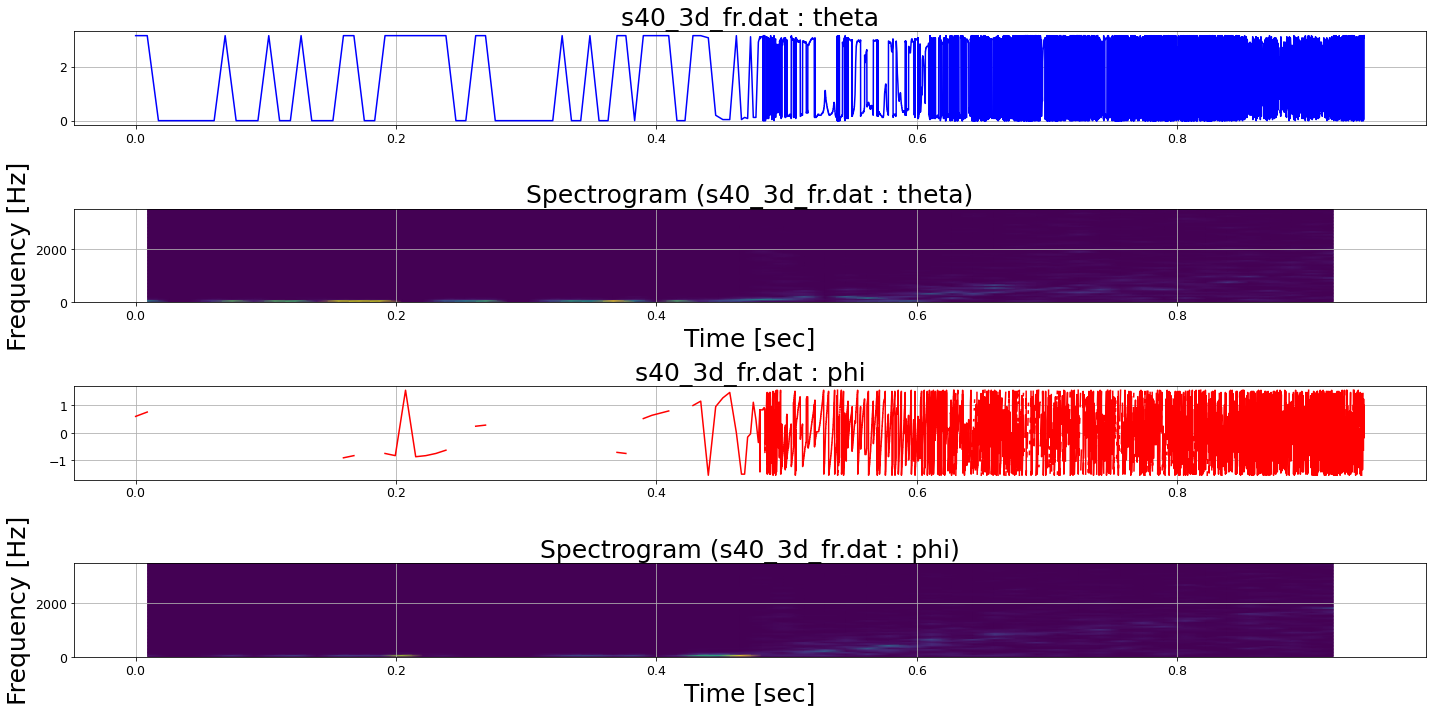

In [28]:
s40_fr.update_nVerts(80j)
s40_fr.update_timeSample=5
s40_fr.dipoleDirecPlots(N = 13e3, polarization=0, angles = [0,np.pi,0,2*np.pi], figSize=(20,10), norm = True, specTF=True, phiTF=True)

mesa20_LR.update_nVerts(80j)
mesa20_LR.update_timeSample=1
mesa20_LR.dipoleDirecPlots(N = 13e3, polarization=0, angles = [0,np.pi,0,2*np.pi], norm = True, specTF=True, phiTF=True)

## Spectrogram Ploting

>### s40_fr

The number of verticies or points has been updated to 80j


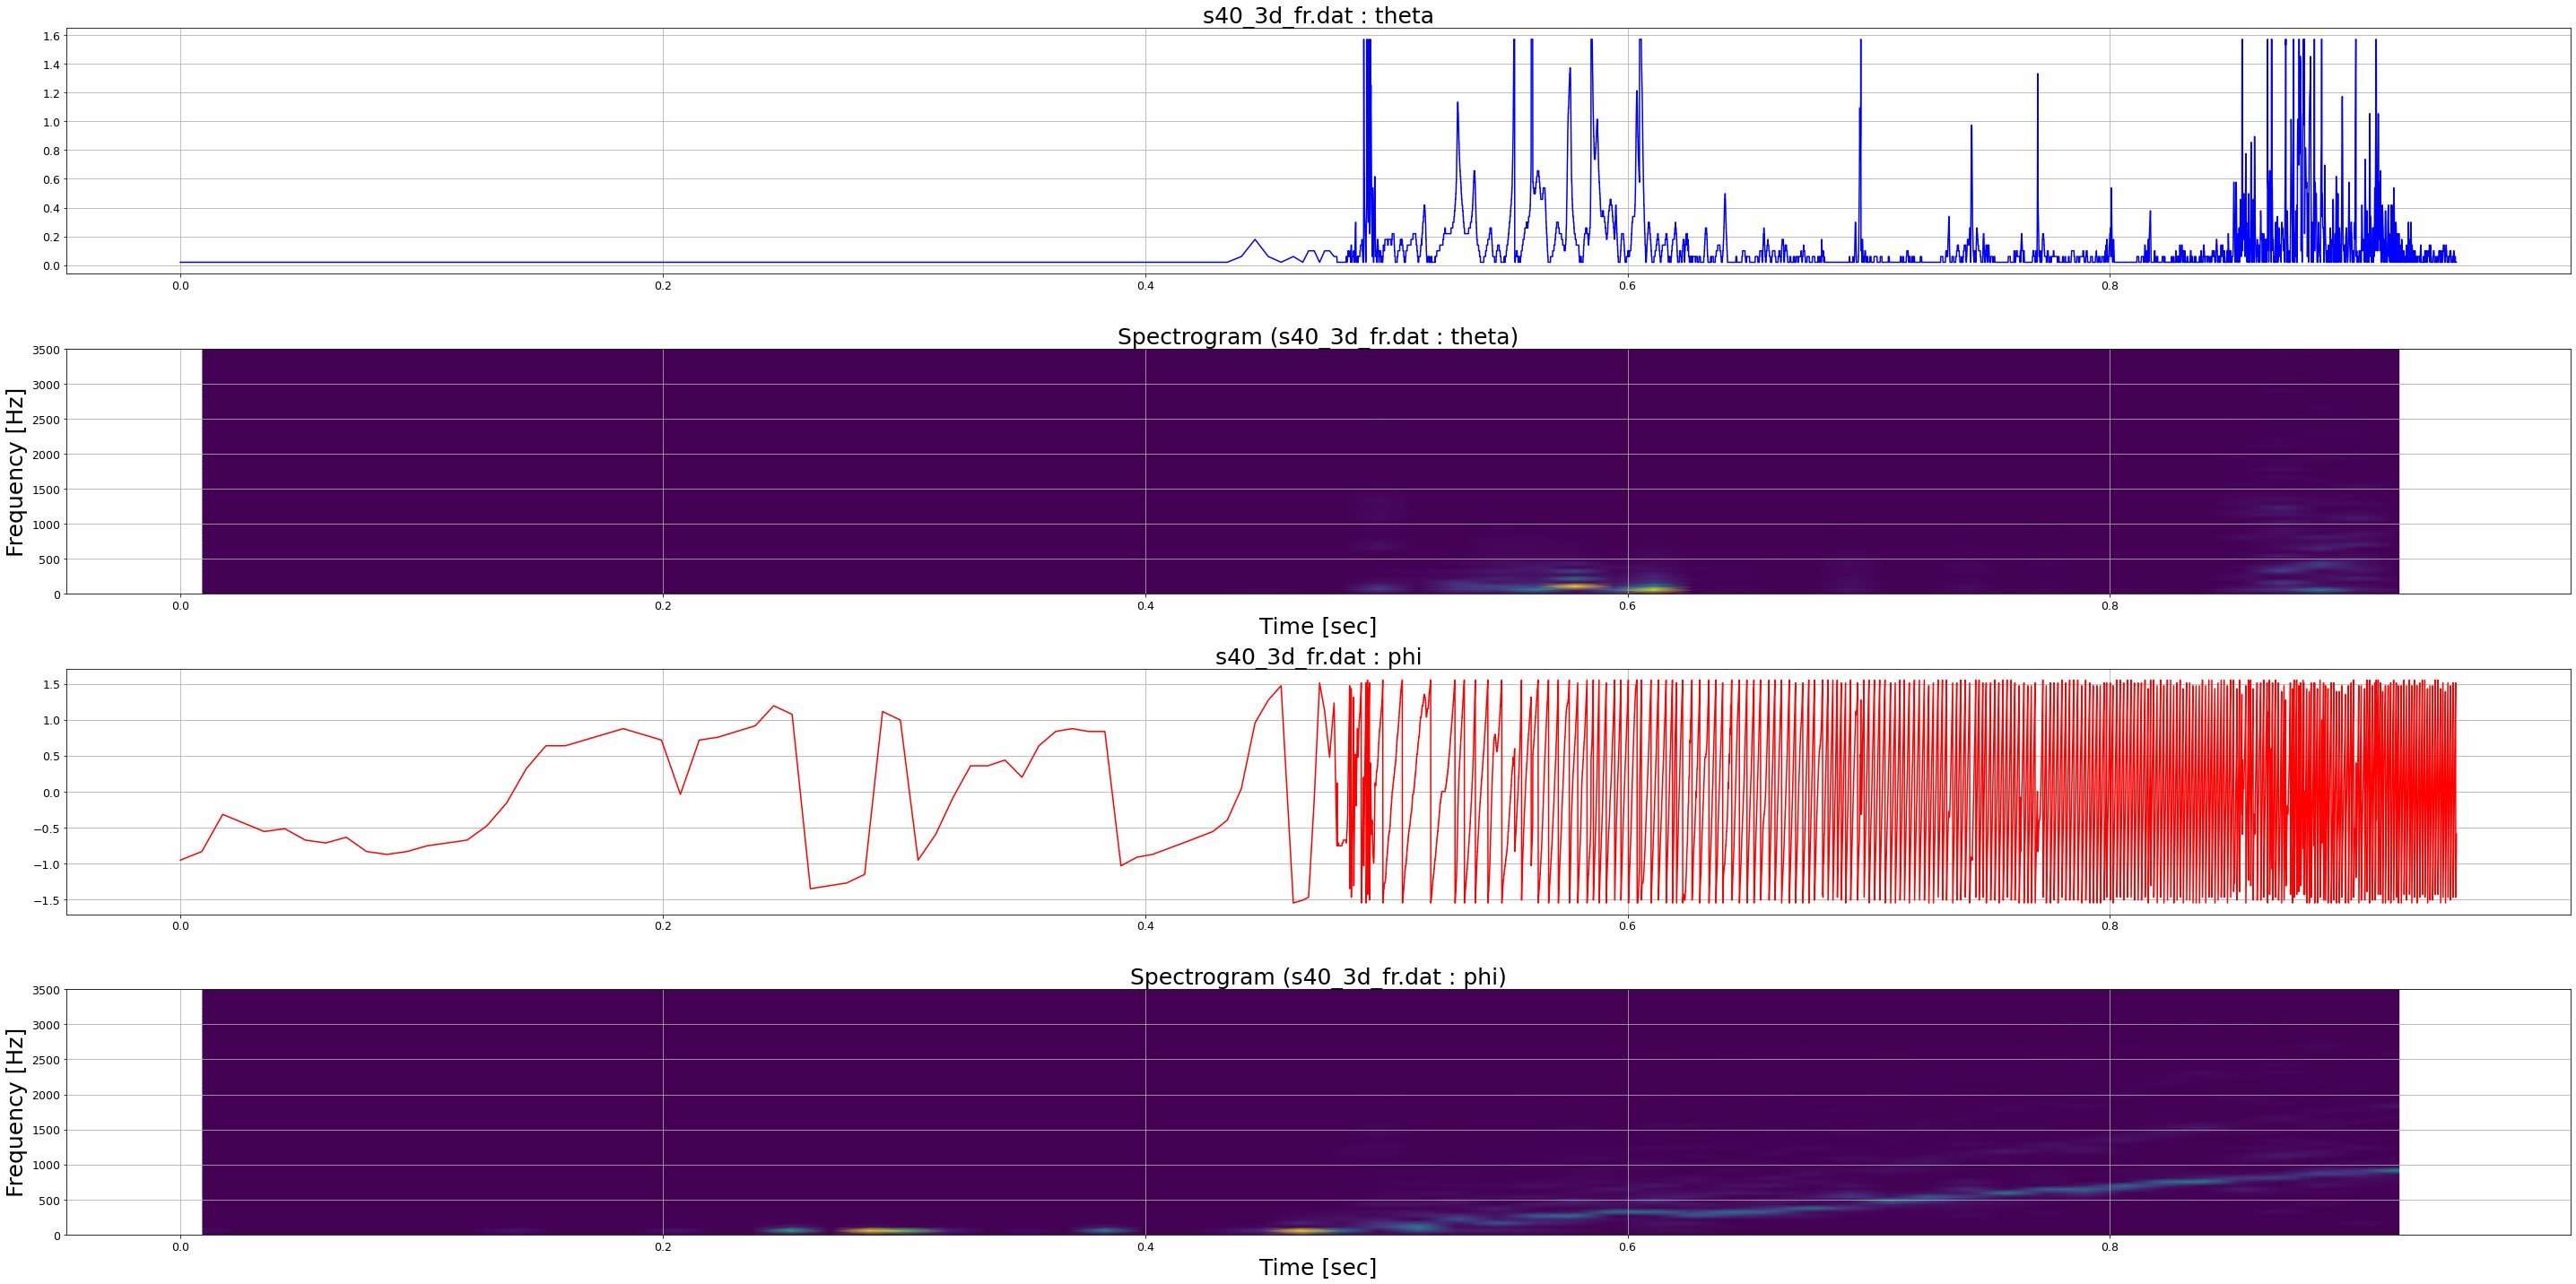

In [24]:
s40_fr.update_nVerts(80j)
s40_fr.update_timeSample=5
s40_fr.dipoleDirecPlots(N = 13e3, polarization=0, angles = [-np.pi/2,np.pi/2,0,2*np.pi], figSize=(40,20), norm = True, specTF=True, phiTF=True)

>### s40_nor

The number of verticies or points has been updated to 80j


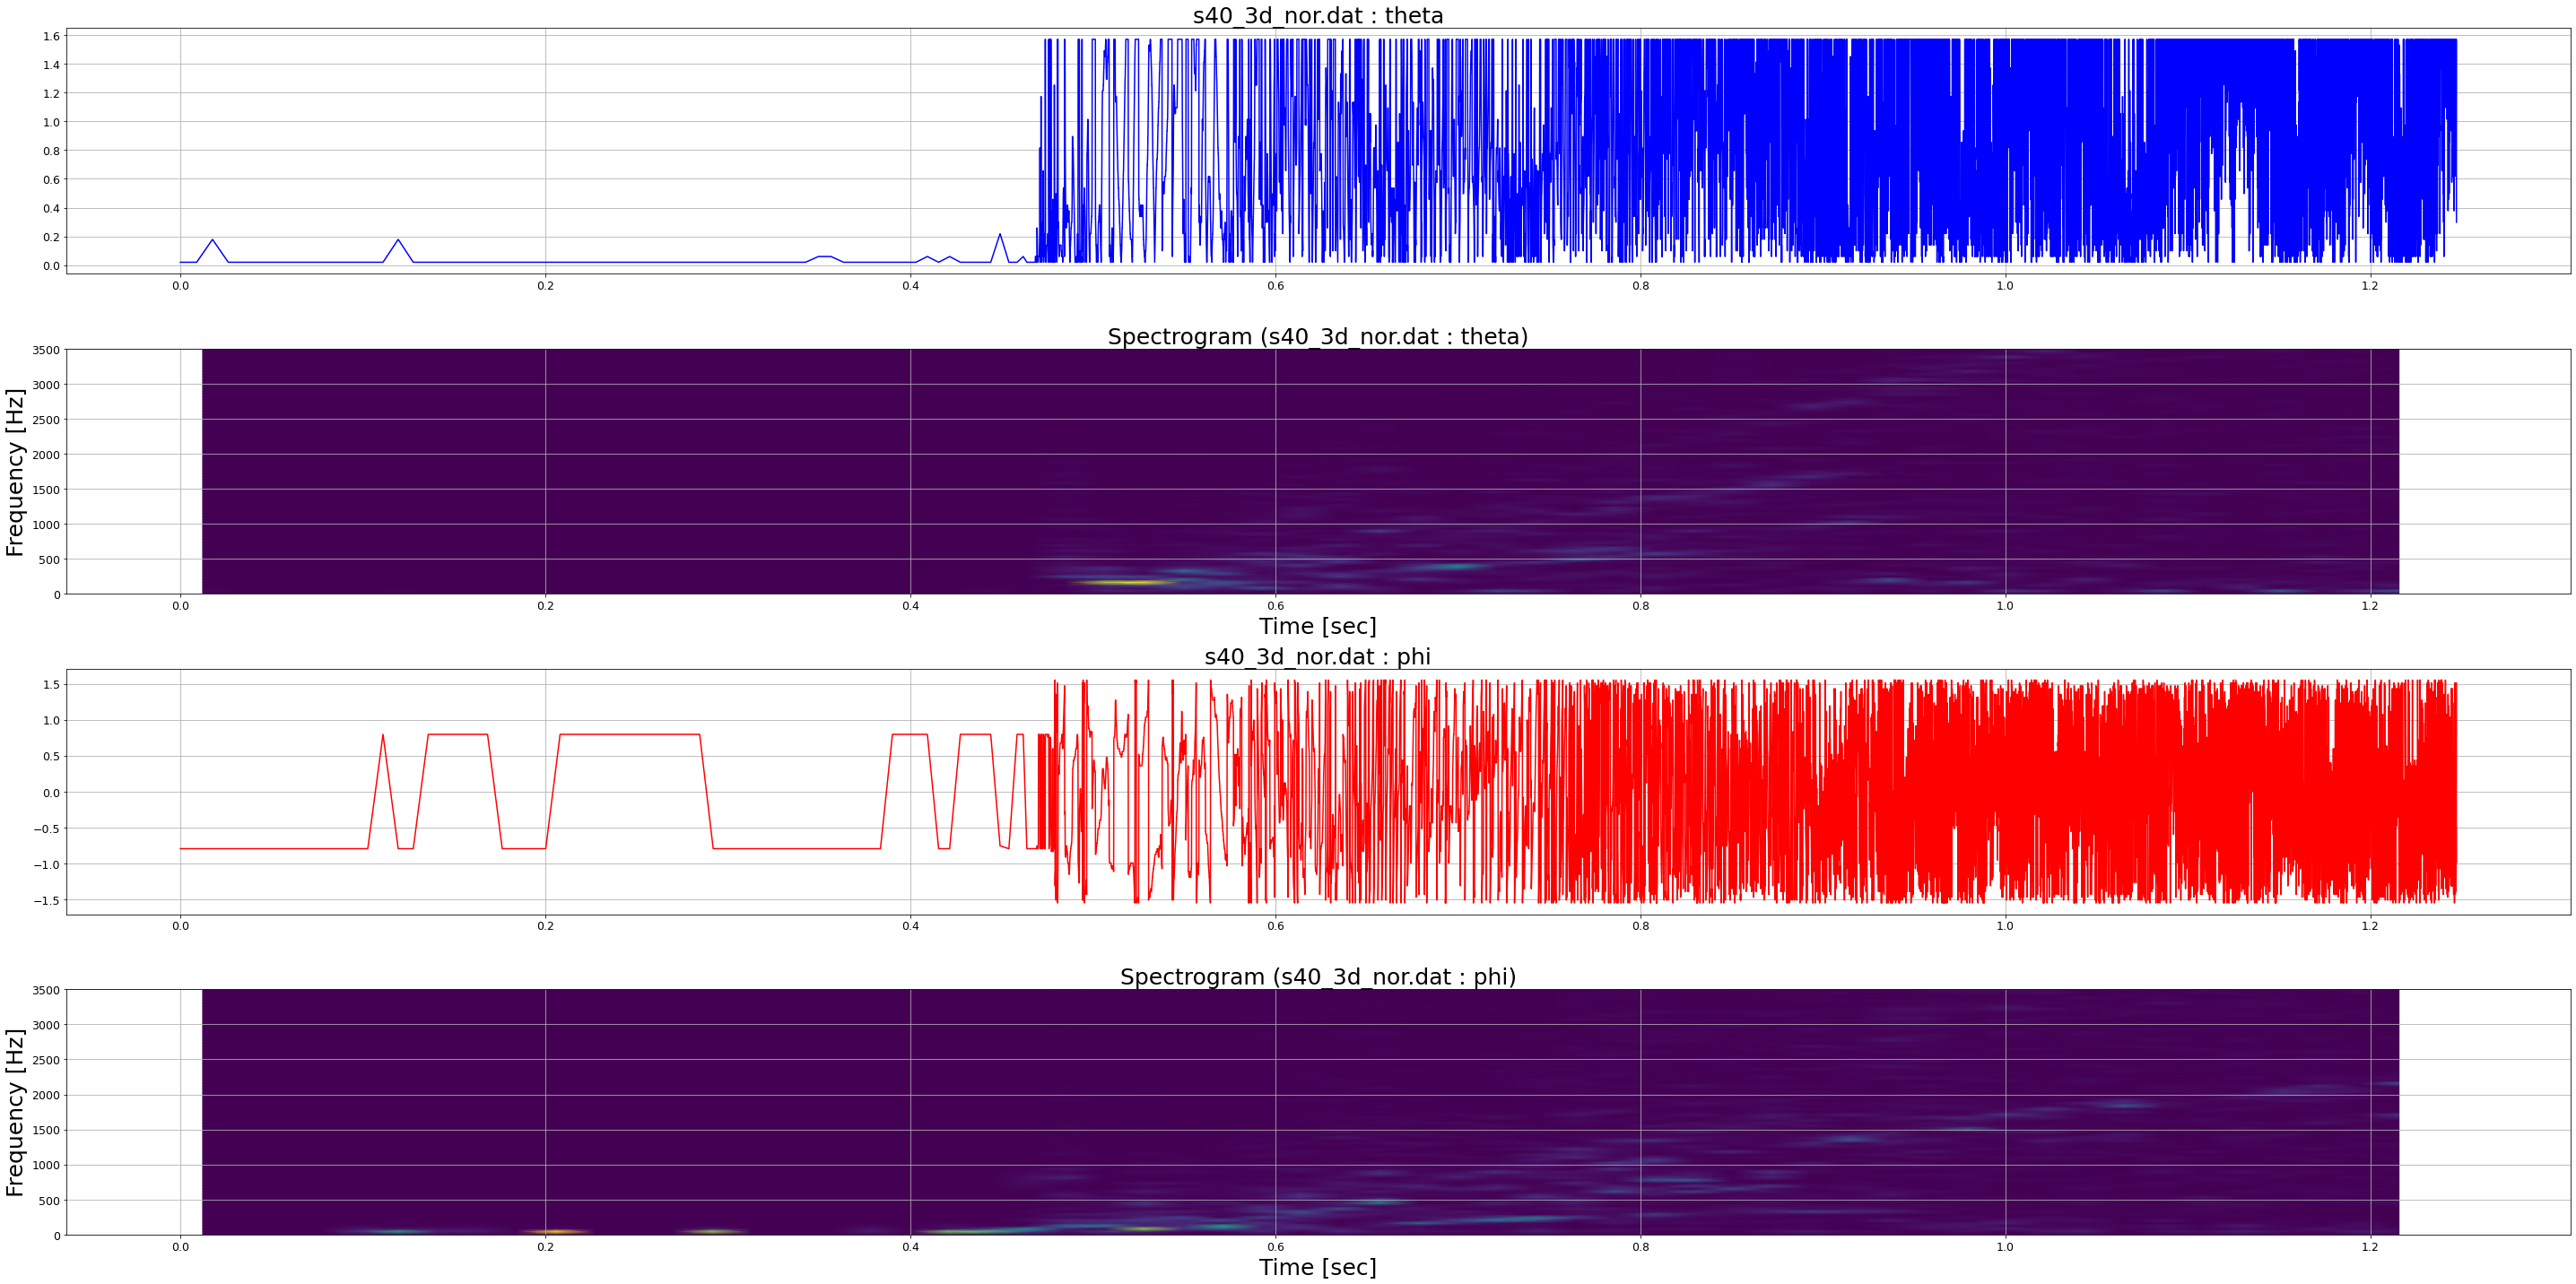

In [25]:
s40_nor.update_nVerts(80j)
s40_nor.update_timeSample=5
s40_nor.dipoleDirecPlots(N = 13e3, polarization=0, angles = [-np.pi/2,np.pi/2,0,2*np.pi], norm = True, specTF=True, phiTF=True)

>### s40_sr

The number of verticies or points has been updated to 80j


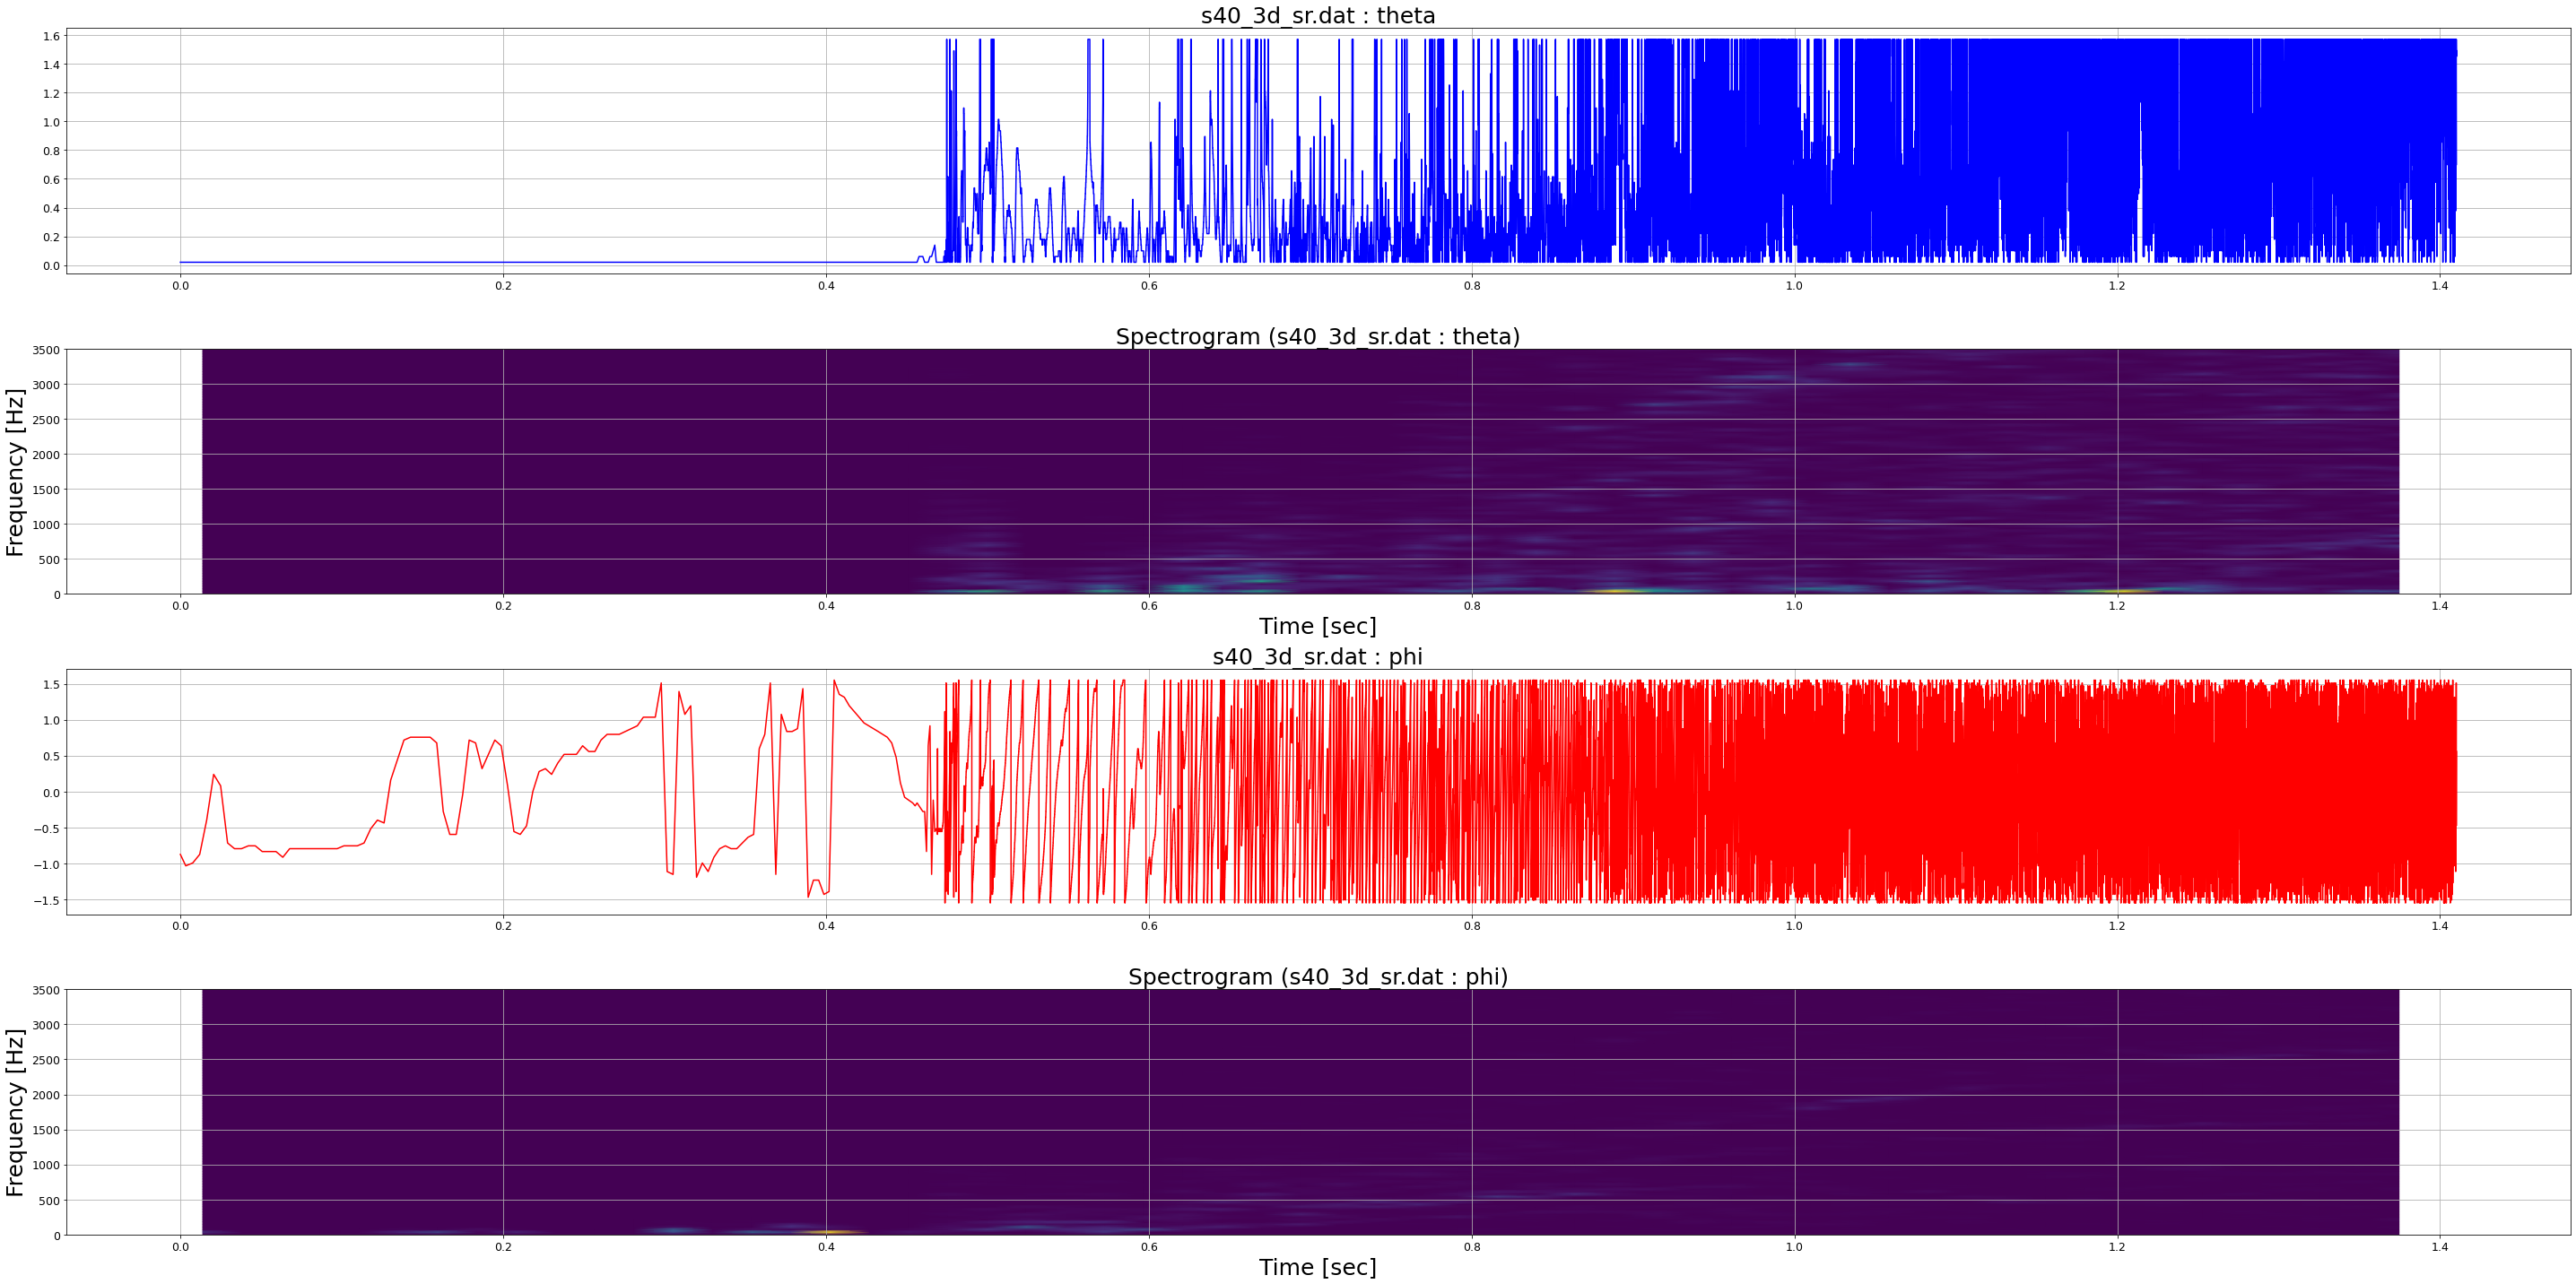

In [26]:
s40_sr.update_nVerts(80j)
s40_sr.update_timeSample=5
s40_sr.dipoleDirecPlots(N = 13e3, polarization=0, angles = [-np.pi/2,np.pi/2,0,2*np.pi], norm = True, specTF=True, phiTF=True)

## Mollweide Plot Testing

>### s40_fr

In [19]:
s40_fr.update_nVerts(80j)

The number of verticies or points has been updated to 80j


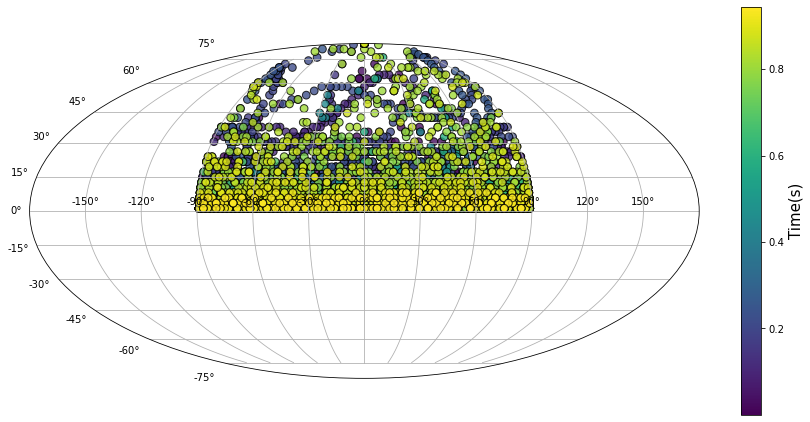

In [20]:
s40_fr.mollweideSpec(polarization=0, angles = [-np.pi/2,np.pi/2,0,2*np.pi])